#Installing and Instructions:
http://continuum.io/downloads

Most of the packages you might need are available in this neat Python offering

#A little bit about IPython Notebooks

In [1]:
# Regular Python code can be written and executed:
a = 3

In [2]:
a ** 3

27

#Additionally you can insert raw text:
In *multiple* formats:

**You can also insert LaTeX code:**

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$t' = \gamma(\frac{t - v_xx}{c^2})$

$x' = \gamma(x - v_xt)$

In [3]:
from IPython.core.display import Image 
Image(width=600,url='http://33.media.tumblr.com/3c4f73eff48d15431492f7796dd68448/tumblr_mknhhrg77I1s6d7ozo1_500.gif')

You can even go so far as to insert YouTube videos

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('5fP4emqw7O4', start=0)

On a more serious note, you can insert figures and plots from your data in python right into your notebooks:

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


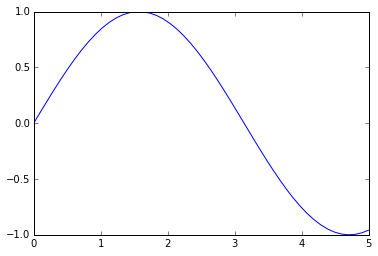

In [6]:
x = np.linspace(0,5)
plt.plot(x,sin(x))
plt.show()

Cells can be easily deleted, created, moved around, etc. All operations have simple keyboard shortcuts. CTRL+M+H displays a list of keyboard shortcuts.
Additionally:
* Tab completion
* Function definition lookup
* Very easy to go back and re-execute previous lines of code
* Can call shell commands
* Consistent look across different browsers
* Static versions of notebooks (like this one) can be viewed by anyone with a browser
* And much, more...

#Data Mining with Notebooks

In [8]:
import pandas as pd
import os
os.chdir("Documents\Fall 2015\Data Mining Demos\Datasets")

** *Let's load some data* **

We use Pandas in order to create a data matrix. Pandas likes to call it a "DataFrame"

In [9]:
df_iris = pd.read_csv("iris.arff.csv", header =0)
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


** *Exploratory Analysis* **

**Histograms**

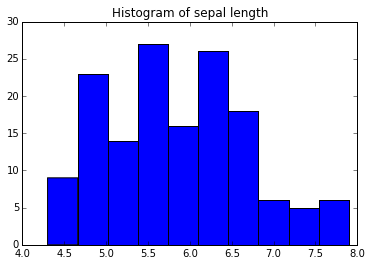

In [11]:
plt.hist(df_iris.sepallength)
plt.title("Histogram of sepal lengths")
plt.show()

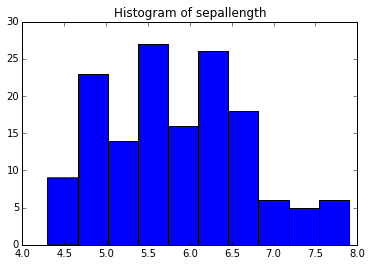

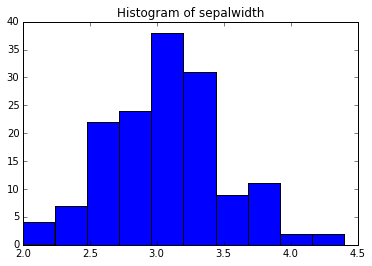

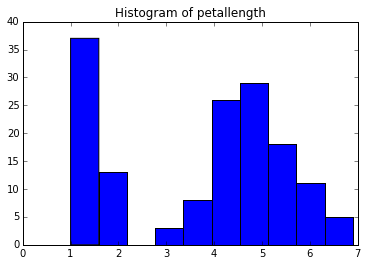

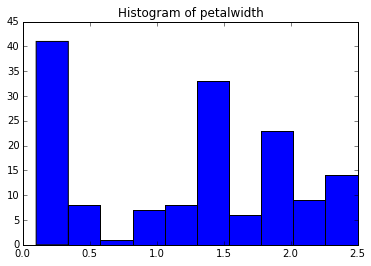

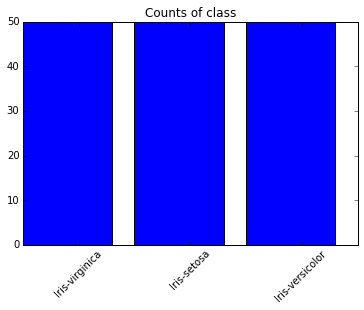

In [26]:
from collections import Counter
for featureName in df_iris.columns:
    if df_iris[featureName].dtypes!='O':
        plt.hist(df_iris[featureName])
        plt.title("Histogram of " + str(featureName))
        plt.show()
    else:
        attrCounter = Counter(df_iris[featureName])
        plt.bar(range(len(attrCounter)), attrCounter.values())
        plt.title("Counts of " + str(featureName))
        plt.xticks([i+0.5 for i in range(len(attrCounter))], attrCounter.keys(), rotation = 45)
        plt.show()

**Box Plots**

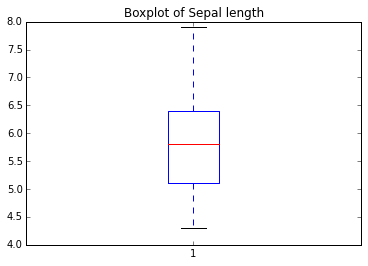

In [35]:
plt.boxplot(df_iris.sepallength)
plt.title("Boxplot of " + "Sepal length")
plt.show()

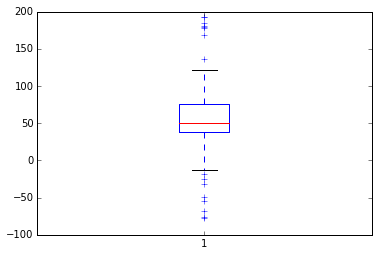

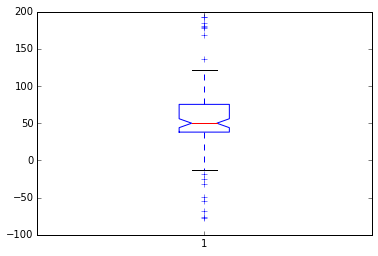

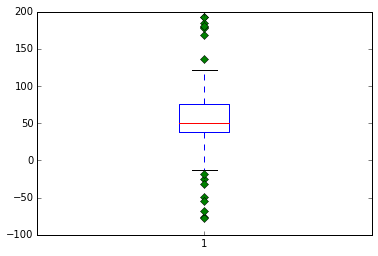

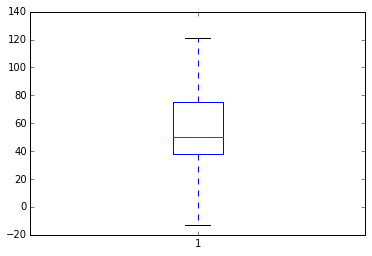

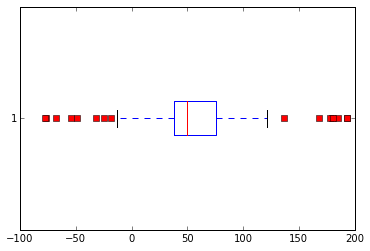

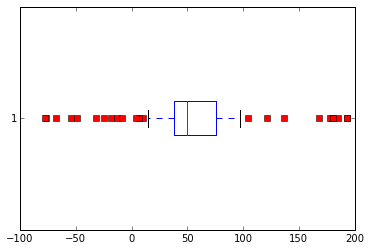

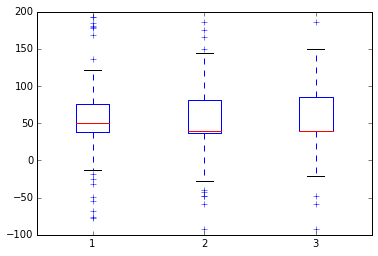

In [37]:
from pylab import *

# fake up some data
spread= rand(50) * 100
center = ones(25) * 50
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
data =concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
boxplot(data)

# notched plot
figure()
boxplot(data,1)

# change outlier point symbols
figure()
boxplot(data,0,'gD')

# don't show outlier points
figure()
boxplot(data,0,'')

# horizontal boxes
figure()
boxplot(data,0,'rs',0)

# change whisker length
figure()
boxplot(data,0,'rs',0,0.75)

# fake up some more data
spread= rand(50) * 100
center = ones(25) * 40
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
d2 = concatenate( (spread, center, flier_high, flier_low), 0 )
data.shape = (-1, 1)
d2.shape = (-1, 1)
#data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2,0]]
# multiple box plots on one figure
figure()
boxplot(data)

show()

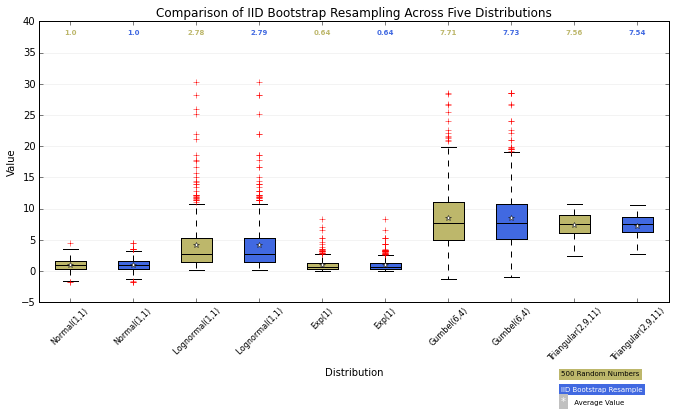

In [36]:
"""
Thanks Josh Hemann for the example
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)',' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
              'Triangular(2,9,11)']
N = 500
norm = np.random.normal(1,1, N)
logn = np.random.lognormal(1,1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N-1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot,  logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
       tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10,6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
              alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki','royalblue']
numBoxes = numDists*2
medians = range(numBoxes)
for i in range(numBoxes):
  box = bp['boxes'][i]
  boxX = []
  boxY = []
  for j in range(5):
      boxX.append(box.get_xdata()[j])
      boxY.append(box.get_ydata()[j])
  boxCoords = zip(boxX,boxY)
  # Alternate between Dark Khaki and Royal Blue
  k = i % 2
  boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
  ax1.add_patch(boxPolygon)
  # Now draw the median lines back over what we just filled in
  med = bp['medians'][i]
  medianX = []
  medianY = []
  for j in range(2):
      medianX.append(med.get_xdata()[j])
      medianY.append(med.get_ydata()[j])
      plt.plot(medianX, medianY, 'k')
      medians[i] = medianY[0]
  # Finally, overplot the sample averages, with horizontal alignment
  # in the center of each box
  plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
           color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes+0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes)+1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick,label in zip(range(numBoxes),ax1.get_xticklabels()):
   k = tick % 2
   ax1.text(pos[tick], top-(top*0.05), upperLabels[tick],
        horizontalalignment='center', size='x-small', weight=weights[k],
        color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08,  str(N) + ' Random Numbers' ,
           backgroundcolor=boxColors[0], color='black', weight='roman',
           size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
backgroundcolor=boxColors[1],
           color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
           weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
           size='x-small')

plt.show()

#Clustering

In [54]:
X = df_iris.iloc[:,:-1]
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
Y = df_iris.iloc[:,-1]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [60]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
df_iris.clusLabels = km.fit_predict(X)

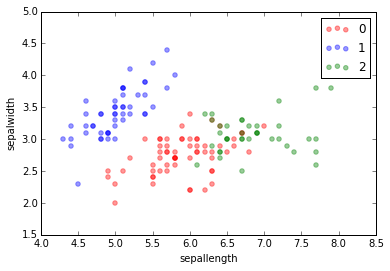

In [64]:
i = 0
j = 1
colorsList = ['r', 'b', 'g']
for clus in np.unique(clusLabels):
    clusMembers = df_iris.loc[df_iris.clusLabels==clus]
    plt.scatter(clusMembers.iloc[:,i], clusMembers.iloc[:,j], color = colorsList[clus], alpha = 0.4, label = clus)
    plt.xlabel(df_iris.columns[i])
    plt.ylabel(df_iris.columns[j])
plt.legend()
plt.show()

#Prediction

In [66]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, auc
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print "Accuracy = ", accuracy_score(Y_test, Y_pred)
print classification_report(Y_test, Y_pred)

 Accuracy =  0.98
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
Iris-virginica       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        50

